In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Ellipse


# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

city_data_df = pd.read_csv(city_data_to_load, low_memory=False)
ride_data_df = pd.read_csv(ride_data_to_load, low_memory=False)


# Combine the data into a single dataset
combined_data_df = pd.merge(city_data_df, ride_data_df, on='city')
# Display the data table for preview
combined_data_df.head()


,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


Text(44, 36, 'Circle size correlates with driver count per city')

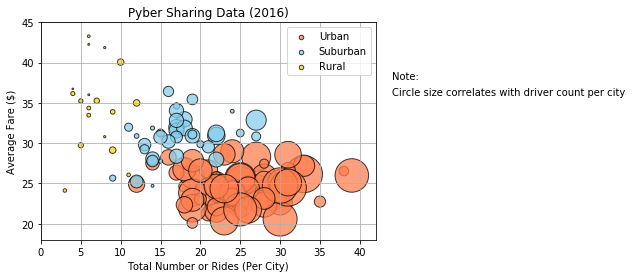

In [20]:
# Obtain the x and y coordinates for each of the three city types
#Urban
typeurban_df = combined_data_df[(combined_data_df["type"] == "Urban")]
x_urban= typeurban_df.groupby(["city"]).count()["ride_id"]
y_urban = typeurban_df.groupby(["city"]).mean()["fare"]
s_urban= 0.6*(typeurban_df.groupby(["city"]).sum()["driver_count"])
urban_summary_df = pd.DataFrame({ "Ride count": x_urban, "Average Fare/City": y_urban})
# urban_summary_df
plt.scatter(x_urban, y_urban, s=s_urban, marker="o", facecolors="coral", edgecolors="black", alpha=0.75, label="Urban")

#Suburban
typesuburban_df = combined_data_df[(combined_data_df["type"] == "Suburban")]
x_suburban= typesuburban_df.groupby(["city"]).count()["ride_id"]
y_suburban = typesuburban_df.groupby(["city"]).mean()["fare"]
s_suburban= 0.6*(typesuburban_df.groupby(["city"]).sum()["driver_count"])
suburban_summary_df = pd.DataFrame({ "Ride count": x_suburban, "Average Fare/City": y_suburban})
# suburban_summary_df
plt.scatter(x_suburban, y_suburban, s=s_suburban, marker="o", facecolors="skyblue", edgecolors="black", alpha=0.75, label="Suburban")


#Rural
typerural_df = combined_data_df[(combined_data_df["type"] == "Rural")]
x_rural= typerural_df.groupby(["city"]).count()["ride_id"]
y_rural = typerural_df.groupby(["city"]).mean()["fare"]
s_rural= 0.6*(typerural_df.groupby(["city"]).sum()["driver_count"])
rural_summary_df = pd.DataFrame({ "Ride count": x_rural, "Average Fare/City": y_rural})
# rural_summary_df
plt.scatter(x_rural, y_rural, s=s_rural, marker="o", facecolors="gold", edgecolors="black", alpha=0.75, label="Rural")


plt.ylim(18,45)
plt.xlim(0,42)
# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure
plt.title("Pyber Sharing Data (2016)")
plt.xlabel("Total Number or Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.legend(loc="upper right") 
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=10)
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])
plt.grid() 
plt.text(44,38 ,"Note:")
plt.text(44,36 ,"Circle size correlates with driver count per city")


## Total Fares by City Type

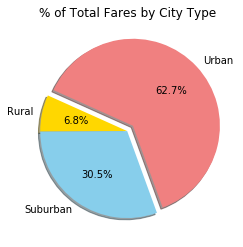

In [21]:
# Calculate Type Percents
faretypeurban_df = combined_data_df[(combined_data_df["type"] == "Urban")].sum()["fare"]

faretypesuburban_df = combined_data_df[(combined_data_df["type"] == "Suburban")].sum()["fare"]

faretyperural_df = combined_data_df[(combined_data_df["type"] == "Rural")].sum()["fare"]

faretotalpie= faretypeurban_df+faretypesuburban_df+faretyperural_df
faretotalpie

fareperurban=faretypeurban_df/faretotalpie
farepersuburban=faretypesuburban_df/faretotalpie
fareperural=faretyperural_df/faretotalpie


farepersuburban
# Build Pie Chart
atype = ["Urban", "Rural", "Suburban"]
Fare = [fareperurban,fareperural, farepersuburban]
explode = (0.09, 0, 0)
plt.title("% of Total Fares by City Type")
colors = ["lightcoral", "gold", "skyblue"]
plt.pie(Fare, explode=explode, labels=atype, colors=colors, autopct="%1.1f%%", shadow=True, startangle=-70)


plt.show()

## Total Rides by City Type

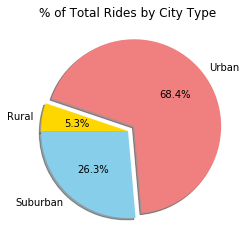

In [271]:
# Calculate Ride Percents
Ridetypeurban_df = combined_data_df[(combined_data_df["type"] == "Urban")].count()["ride_id"]

Ridetypesuburban_df = combined_data_df[(combined_data_df["type"] == "Suburban")].count()["ride_id"]

Ridetyperural_df = combined_data_df[(combined_data_df["type"] == "Rural")].count()["ride_id"]

Ridetotalpie= Ridetypeurban_df+Ridetypesuburban_df+Ridetyperural_df


Rideperurban=Ridetypeurban_df/Ridetotalpie
Ridepersuburban=Ridetypesuburban_df /Ridetotalpie
Rideperural=Ridetyperural_df/Ridetotalpie


Rideperural
# Build Pie Chart
atype = ["Urban", "Rural", "Suburban"]
Rides = [Rideperurban,Rideperural, Ridepersuburban]
explode = (0.09, 0.0, 0.0)
plt.title("% of Total Rides by City Type")
colors = ["lightcoral", "gold", "skyblue"]
plt.pie(Rides, explode=explode, labels=atype, colors=colors, autopct="%1.1f%%", shadow=True, startangle=-85)


plt.show()
# Save Figure


In [272]:
# Show Figure
plt.show()

## Total Drivers by City Type

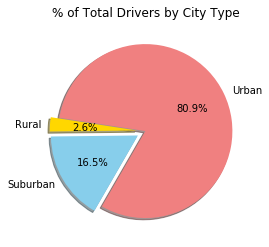

In [29]:
driver_data=combined_data_df[["city","driver_count","type"]]
clean_driver=driver_data.drop_duplicates()
clean_driver

drivertypeurban_df = clean_driver[(clean_driver["type"] == "Urban")].sum()["driver_count"]

drivertypesuburban_df = clean_driver[(clean_driver["type"] == "Suburban")].sum()["driver_count"]

drivertyperural_df = clean_driver[(clean_driver["type"] == "Rural")].sum()["driver_count"]

drivertotalpie= drivertypeurban_df+drivertypesuburban_df+drivertyperural_df
drivertotalpie

driverperurban=drivertypeurban_df/drivertotalpie
driverpersuburban=drivertypesuburban_df/drivertotalpie
driverperural=drivertyperural_df/drivertotalpie
driverperurban
# Build Pie Chart

atype = ["Urban", "Rural", "Suburban"]
Drivers = [driverperurban,driverperural, driverpersuburban]
explode = (0.0, 0.1, 0.1)
plt.title("% of Total Drivers by City Type")
colors = ["lightcoral", "gold", "skyblue"]
plt.pie(Drivers, explode=explode, labels=atype, colors=colors, autopct="%1.1f%%", shadow=True, startangle=-120)


plt.show()
